# Simple feature analysis

In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
class LoanConfig:
    dataset_train = os.path.join("..", "..", "extracted_data", "train.csv")
    dataset_test = os.path.join("..", "..", "extracted_data", "test.csv")
    dataset_sub = os.path.join("..", "..", "extracted_data", "sample_submission.csv")
    
    target_variable = "loan_status"
    

In [31]:
df_train = pd.read_csv(LoanConfig.dataset_train, index_col='id')
df_test = pd.read_csv(LoanConfig.dataset_test, index_col='id')
df_sub = pd.read_csv(LoanConfig.dataset_sub)

In [32]:
df_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [33]:
df_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
id,,,,,,,,,,,
58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [34]:
df_sub.head()

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5


Info of each column in the dataset.

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.8+ MB


Simple statical analysis of dataset, using pandas built-in function.

In [47]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106978,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


Columns in the data sets.

In [37]:
df_train.columns.to_list()

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length',
 'loan_status']

### Checking for missing values

In [45]:
df_train.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

from the above observation, dataset doesnot contain any missing values.

# Exploratory data analysis

### Examining  the features

In [43]:
categorical_features = df_train.select_dtypes(include="object").columns.to_list()
for cat in categorical_features:
    print(f"{cat}: {df_train[cat].nunique()} unqiue values.")

person_home_ownership: 4 unqiue values.
loan_intent: 6 unqiue values.
loan_grade: 7 unqiue values.
cb_person_default_on_file: 2 unqiue values.


Given dataset is the classification problem, we have to predict for the approval of loan. It's a binary classficiation problem.

Let's start by checking the target features in the training dataset.

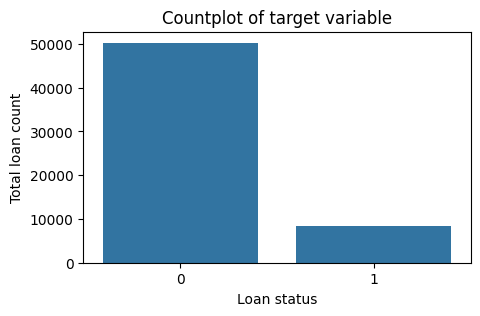

In [44]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_train, x=LoanConfig.target_variable)
plt.title("Countplot of target variable")
plt.xlabel("Loan status")
plt.ylabel("Total loan count")
plt.show()

In [28]:
df_train['loan_status'].value_counts(normalize=True).round(3).astype(str) + "%"

loan_status
0    0.858%
1    0.142%
Name: proportion, dtype: object

##### Exploring numerical features

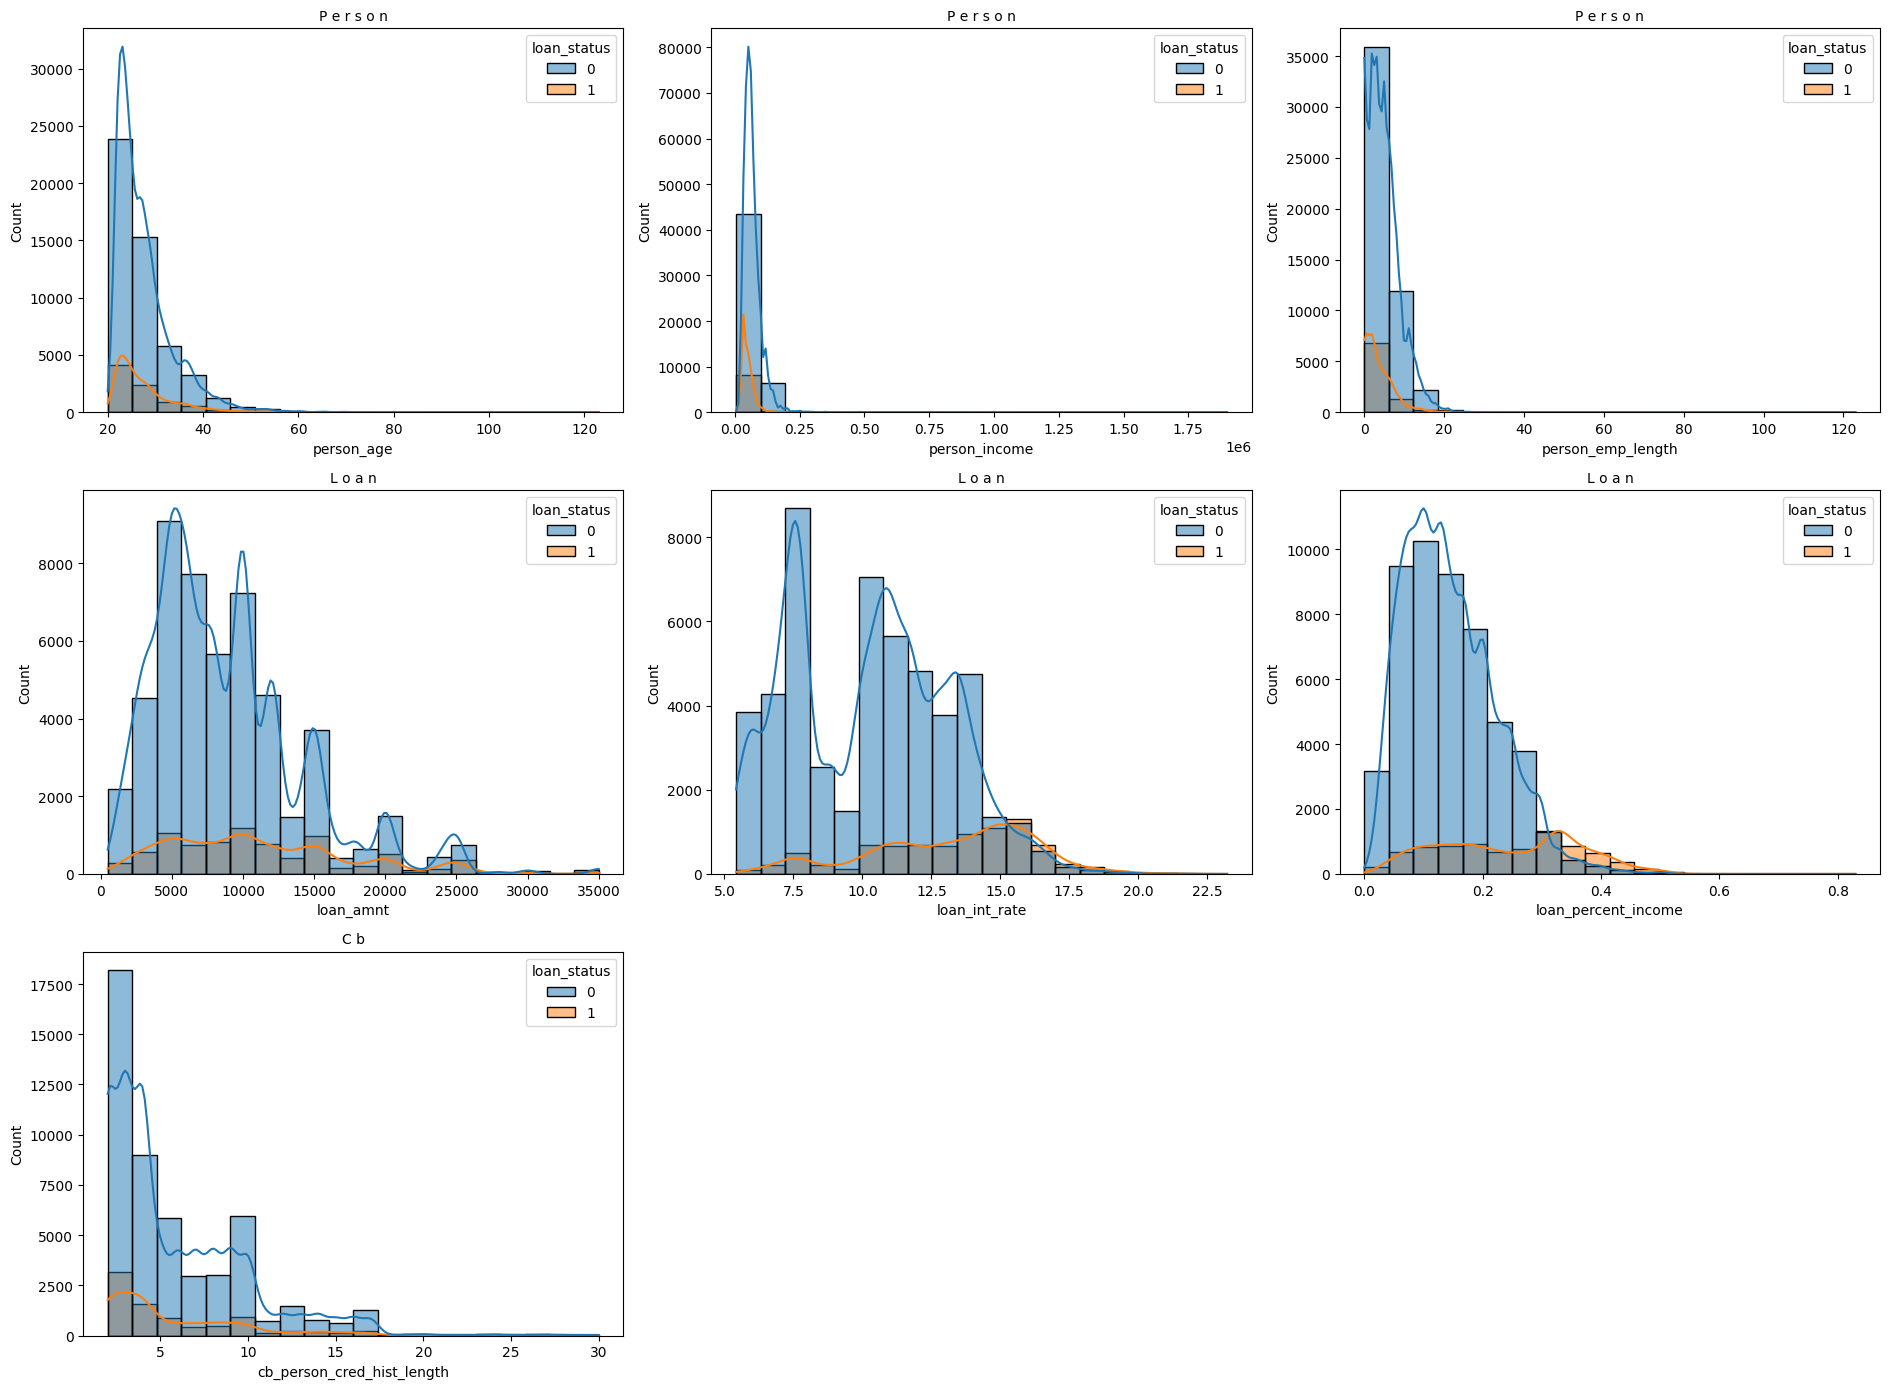

In [58]:
numerical_features = df_train.select_dtypes(exclude=['object']).columns.tolist()
fig, axs = plt.subplots(3, 3, figsize=(19, 14))

for feat, ax in zip(numerical_features, axs.ravel()):
    sns.histplot(x=feat, hue=LoanConfig.target_variable, data=df_train, kde=True, bins=20, ax=ax)
    ax.set_title(f"{feat}", fontsize=10)
    
# Remove the last two unused subplots
for i in range(7, 9):
    fig.delaxes(axs.ravel()[i])
    
plt.tight_layout()
plt.show()

##### Box plots

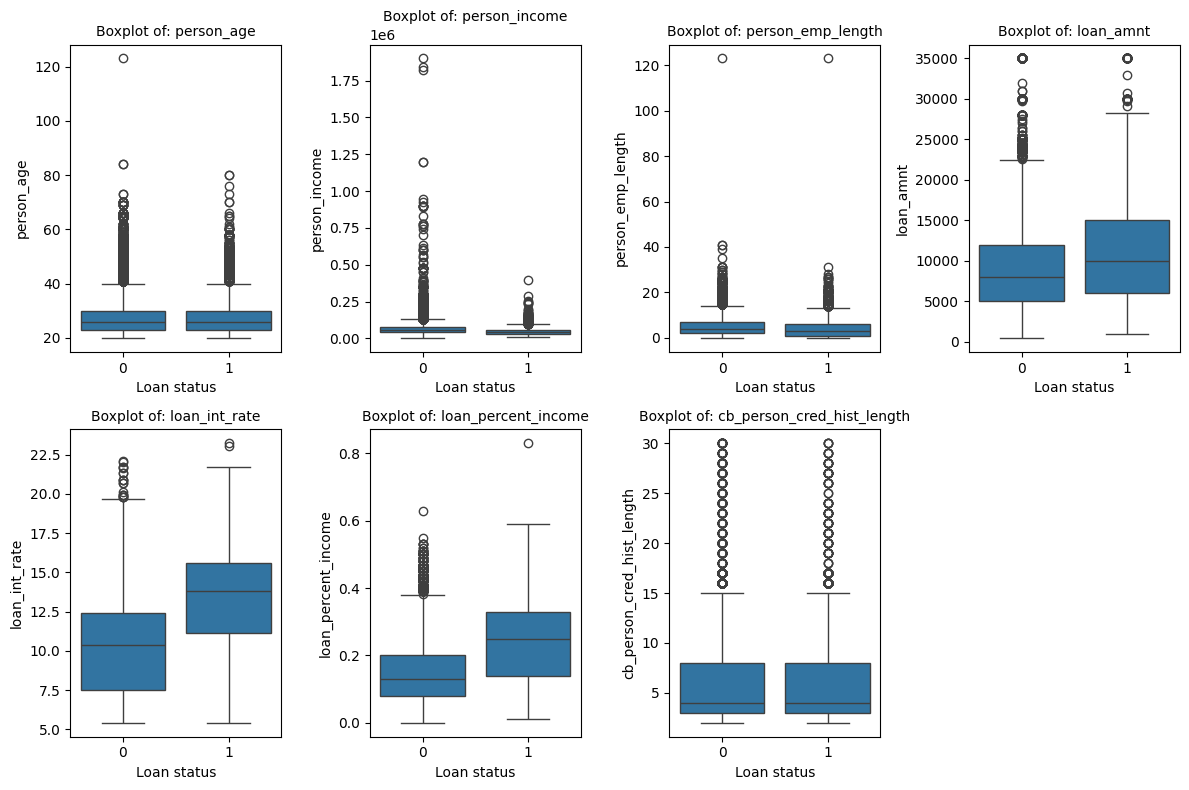

In [60]:
numerical_features = df_train.select_dtypes(exclude=['object']).columns.tolist()
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for feat, ax in zip(numerical_features, axs.ravel()):
    sns.boxplot(y=feat, x=LoanConfig.target_variable, data=df_train, ax=ax)
    ax.set_title(f"Boxplot of: {feat}", size=10)
    ax.set_xlabel("Loan status")
    
# Remove the last two unused subplots
fig.delaxes(axs.ravel()[7])
    
plt.tight_layout()
plt.show()

#### Detecting outliers

In [64]:
def detect_outliers(df, column):
    Q1 = np.quantile(df[column], 0.25)
    Q3 = np.quantile(df[column], 0.75)
    
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5  * IQR)
    upper_limit = Q3 + (1.5  * IQR)
    
    return df[(df[column] < lower_limit) | (df[column] > upper_limit)]

for feat in numerical_features:
    outliers = detect_outliers(df_train, feat)
    print(f"Outliers in column: {feat}: {outliers.shape[0]}")

Outliers in column: person_age: 2446
Outliers in column: person_income: 2411
Outliers in column: person_emp_length: 1274
Outliers in column: loan_amnt: 2045
Outliers in column: loan_int_rate: 34
Outliers in column: loan_percent_income: 1210
Outliers in column: cb_person_cred_hist_length: 1993
Outliers in column: loan_status: 8350


(np.float64(5000.0), np.float64(12000.0))

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,1.000000,0.102176,0.121276,0.050378,0.009653,-0.031975,0.874260,-0.001130
person_income,0.102176,1.000000,0.164042,0.310942,-0.057611,-0.280314,0.082727,-0.169956
person_emp_length,0.121276,0.164042,1.000000,0.092046,-0.101910,-0.065824,0.102842,-0.100428
loan_amnt,0.050378,0.310942,0.092046,1.000000,0.113582,0.647266,0.045720,0.144982
loan_int_rate,0.009653,-0.057611,-0.101910,0.113582,1.000000,0.152201,0.007535,0.338948
loan_percent_income,-0.031975,-0.280314,-0.065824,0.647266,0.152201,1.000000,-0.023202,0.378280
cb_person_cred_hist_length,0.874260,0.082727,0.102842,0.045720,0.007535,-0.023202,1.000000,-0.003030
loan_status,-0.001130,-0.169956,-0.100428,0.144982,0.338948,0.378280,-0.003030,1.000000
